**Практическое задание**

Вариант 1. (простой)

обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10

оценить рост точности при увеличении ширины сети (больше ядер)

оценить рост точности при увеличении глубины сети (больше слоев)

(опциционально)сравнить с точностью полносвязной сети для этой выборки

Вариант 2. (сложный)

реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.

оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.

оценить рост точности при увеличении глубины сети (больше слоев)

In [ ]:
from __future__ import print_function
import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [ ]:
data_augmentation = False

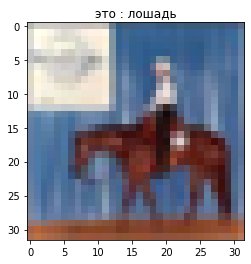

In [ ]:
N = 1130

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

In [ ]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=-1)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
1563/1563 [==============================] - 12s 7ms/step - loss: 2.1475 - accuracy: 0.1957 - val_loss: 1.9098 - val_accuracy: 0.3203
сохранить обученную модель как /content/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 1s 4ms/step - loss: 1.9098 - accuracy: 0.3203
Test loss: 1.9098261594772339
Test accuracy: 0.32030001282691956


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_32 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_33 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 15, 15, 32)        0         
                                                      

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip= False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

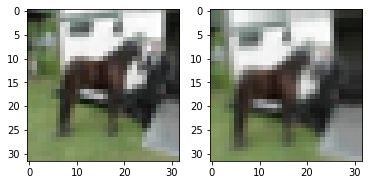

In [ ]:
N=20
datagen.fit(x_test)
for imag,y  in datagen.flow(x_test[N:N+1,:,:,:],y_test[N:N+1], batch_size=1):
  plt.subplot(1,2,1)
  plt.imshow(x_test[N][:,:,:])
  plt.subplot(1,2,2)
  plt.imshow(imag[0,:,:,:])

  plt.show()
  if True:
    break


In [ ]:
 model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


1563/1563 [==============================] - 30s 19ms/step - loss: 1.8635 - accuracy: 0.3209 - val_loss: 1.7672 - val_accuracy: 0.3615


In [ ]:
 model.fit(x_train, y_train, batch_size=batch_size,epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1556 - accuracy: 0.5885 - val_loss: 1.0438 - val_accuracy: 0.6279
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0978 - accuracy: 0.6109 - val_loss: 1.0330 - val_accuracy: 0.6371
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0450 - accuracy: 0.6286 - val_loss: 0.9899 - val_accuracy: 0.6521
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0016 - accuracy: 0.6432 - val_loss: 0.9778 - val_accuracy: 0.6603
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9642 - accuracy: 0.6585 - val_loss: 0.8970 - val_accuracy: 0.6821
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9234 - accuracy: 0.6743 - val_loss: 0.9111 - val_accuracy: 0.6789
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8868 - accuracy: 0.6863 - val_loss: 0.8639 - val_ac

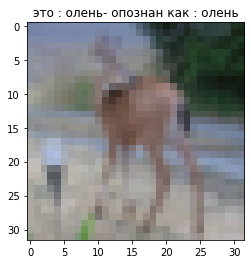

In [ ]:
N = 100
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Стандартная сборка - loss: 1.2554 - accuracy: 0.5520 - val_loss: 1.1496 - val_accuracy: 0.5886

После добавления слоев - loss: 1.4178 - accuracy: 0.4797 - val_loss: 1.2487 - val_accuracy: 0.5444

loss: 1.3013 - accuracy: 0.5297 - val_loss: 1.1972 - val_accuracy: 0.5726

loss: 1.3647 - accuracy: 0.5063 - val_loss: 1.4122 - val_accuracy: 0.4767

Дабавление слоев улучшает качество, но при черезмерном количестве происходит ухудшение.

После добавления ядер - loss: 1.2121 - accuracy: 0.5664 - val_loss: 1.1090 - val_accuracy: 0.6068

Добавление ядер увеличивает точность модели

Добавим количество эпох до 10 - loss: 0.7887 - accuracy: 0.7223 - val_loss: 0.8221 - val_accuracy: 0.7092

Увеличение слоев, ядер и количество эпох улучшело качество модели, но черезмерное увеличение видет к большим потерям и переобучению